In [11]:
# 预定义数据
code = "300059.SZ"
ma = 10
begin = "20160101"


In [12]:
# 导入本地文件
import sys
sys.path.append("/Users/admin/Documents/github/UGFAFAFA/code/")

In [13]:
### 导入包

In [14]:
import os
import pandas as pd
import numpy as np
import talib as tlb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### 加载数据

In [15]:
from Tusharedata.daily import load
df = load(code=code)
# df = df[df["date"] > "20210101"]

df.head()

DEBUG:root:>>>>> load DataCache
2021-05-14 19:12:23,211 INFO sqlalchemy.engine.base.Engine SELECT data_cache.id AS data_cache_id, data_cache."key" AS data_cache_key, data_cache.value AS data_cache_value 
FROM data_cache 
WHERE data_cache."key" = ?
 LIMIT ? OFFSET ?
INFO:sqlalchemy.engine.base.Engine:SELECT data_cache.id AS data_cache_id, data_cache."key" AS data_cache_key, data_cache.value AS data_cache_value 
FROM data_cache 
WHERE data_cache."key" = ?
 LIMIT ? OFFSET ?
2021-05-14 19:12:23,243 INFO sqlalchemy.engine.base.Engine ('daily.300059.sz', 1, 0)
INFO:sqlalchemy.engine.base.Engine:('daily.300059.sz', 1, 0)
DEBUG:root:>>>>> load DataCache end
DEBUG:root:>>>>> load return data


,ts_code,date,open,high,low,close,pre_close,change,pct_chg,vol,amount
2645,300059.SZ,20100319,1.3124,1.3382,1.2485,1.2554,0.8731,0.3823,43.7865,197373.26,1.182394e+06
2644,300059.SZ,20100322,1.3146,1.3811,1.2965,1.3811,1.2554,0.1257,10.0127,110103.62,6.935957e+05
2643,300059.SZ,20100323,1.3555,1.4127,1.3451,1.4006,1.3811,0.0195,1.4119,85522.14,5.471359e+05
2642,300059.SZ,20100324,1.4024,1.5381,1.3907,1.4779,1.4006,0.0773,5.5191,72530.24,4.917786e+05
2641,300059.SZ,20100325,1.4777,1.5405,1.4635,1.5013,1.4779,0.0234,1.5833,60225.14,4.190101e+05


In [16]:
from Tusharedata.lib import mas
mas(df, [ma])
df["signal_0"] = (df["close"]-df["ma"+str(ma)]) / df["ma"+str(ma)]
s0max = df["signal_0"].max()
s0min = df["signal_0"].min()
df["signal_1"] = (df["signal_0"]-s0min)/(s0max-s0min)
df["signal_2"] = (2*df["signal_1"])-1
df["signal_3"] = -np.square(df["signal_2"]) + 1 
df["signal_4"] = df["signal_0"]>0
df["signal_4"] = df["signal_4"].astype("int")
df["signal_4"] = (2*df["signal_4"])-1
df["signal"] = df["signal_4"]*df["signal_3"]
df[["signal_0","signal_4","signal"]]
# print(df["signal"].describe())


INFO:root:mas BEGIN
INFO:root:mas  END


,signal_0,signal_4,signal
2645,NaN,-1,NaN
2644,NaN,-1,NaN
2643,NaN,-1,NaN
2642,NaN,-1,NaN
2641,NaN,-1,NaN
...,...,...,...
4,-0.035040,-1,-0.892156
3,-0.013958,-1,-0.924938
2,-0.016817,-1,-0.920840
1,-0.013870,-1,-0.925062


468103698615
20190423signal: -0.9333297602648021
20190424buy ----
20190424signal: 0.9499757406198243
20190425seller ----
20190425signal: -0.8960249763161623
20190426signal: -0.8981229223786255
20190429signal: -0.7397887155125877
20190430signal: -0.740774702722341
20190506signal: -0.521333698968035
20190507signal: -0.6368888347616327
20190508signal: -0.7012119501220111
20190509signal: -0.7533774594184318
20190510signal: -0.9089061445799317
20190513signal: -0.8884158049620843
20190514signal: -0.9130168498218156
20190515buy ----
20190515signal: 0.9576570098144729
20190516signal: 0.9517807922397401
20190517seller ----
20190517signal: -0.898944875181213
20190520signal: -0.9251352313570925
20190521buy ----
20190521signal: 0.9451221074199712
20190522seller ----
20190522signal: -0.9236188560626603
20190523signal: -0.9185144719241423
20190524signal: -0.9220460662059246
20190527buy ----
20190527signal: 0.9626015541536334
20190528signal: 0.968003490227518
20190529signal: 0.9685162349327396
201905

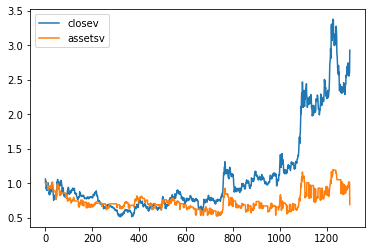

In [17]:
# 回测
from Analyse.back_trading import back_trading
df = df[df["date"] > begin]
df = back_trading(df)
df["closev"] = df["close"]/(df["close"].iloc[1])
df["assetsv"] = df["assets"]/10000
df.to_csv("/Users/admin/Documents/github/UGFAFAFA/data/tem/test.csv")
df[["closev","assetsv"]].plot()
plt.show()


In [18]:
from chart.kline import kline
kline(df,height = "550px").render("/Users/admin/Documents/github/UGFAFAFA/data/tem/line.html")

DEBUG:root:kline begin
bspoints and b 20160118 / 11.3987
bspoints and b 20160202 / 10.4747
bspoints and b 20160308 / 9.6914
bspoints and b 20160314 / 9.7153
bspoints and b 20160317 / 10.3127
bspoints and b 20160405 / 11.8793
bspoints and b 20160412 / 11.8155
bspoints and b 20160520 / 9.9329
bspoints and b 20160531 / 10.5316
bspoints and b 20160622 / 10.4406
bspoints and b 20160712 / 10.8381
bspoints and b 20160808 / 9.3917
bspoints and b 20160831 / 9.6456
bspoints and b 20160906 / 9.6647
bspoints and b 20160927 / 9.1571
bspoints and b 20160929 / 9.1666
bspoints and b 20161018 / 9.3151
bspoints and b 20161024 / 9.3774
bspoints and b 20161103 / 9.4109
bspoints and b 20161108 / 9.3917
bspoints and b 20161110 / 9.3534
bspoints and b 20170105 / 8.2519
bspoints and b 20170126 / 7.6245
bspoints and b 20170208 / 7.6772
bspoints and b 20170414 / 7.1599
bspoints and b 20170503 / 6.3554
bspoints and b 20170508 / 6.2978
bspoints and b 20170511 / 6.3382
bspoints and b 20170516 / 6.2805
bspoints and

'/Users/admin/Documents/github/UGFAFAFA/data/tem/line.html'